In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Old Data

In [ ]:
old_data = pd.read_csv('/content/drive/MyDrive/Uganda/old_data/uganda-60-10--1-SPO2-PULSE_RATE-RESPIRATORY_RATE_full.csv')
old_data.head(2)

,generatedat,date_surgery,patient_id,first_name,last_name,sourceid,name,doublevalue,week,health_service_id_new,bp_140_90,bp_160_110,mrrh_ipno
0,2020-01-24 22:35:03,2020-01-24,b0e7d518-926a-4ffe-894f-1b73b6388a70,Nu,Sa,00A003E3,RESPIRATORY_RATE,14.044944,1,3-71-24,0,0,876
1,2020-01-24 22:35:04,2020-01-24,b0e7d518-926a-4ffe-894f-1b73b6388a70,Nu,Sa,00A003E3,RESPIRATORY_RATE,14.100754,1,3-71-24,0,0,876


In [ ]:
old_data.shape

(870693, 13)

In [ ]:
old_data['name'].unique()

array(['RESPIRATORY_RATE', 'SPO2', 'PULSE_RATE'], dtype=object)

In [ ]:
old_data['patient_id'].nunique()

106

In [ ]:
old_data.columns

Index(['generatedat', 'date_surgery', 'patient_id', 'first_name', 'last_name',
       'sourceid', 'name', 'doublevalue', 'week', 'health_service_id_new',
       'bp_140_90', 'bp_160_110', 'mrrh_ipno'],
      dtype='object')

In [ ]:
print(old_data['generatedat'].min(), old_data['generatedat'].max())

2020-01-24 22:35:03 2022-02-19 18:12:54


# New Data

## Vital Alarm Data

In [ ]:
vital_alarm_sample = pd.read_csv('/content/drive/MyDrive/Uganda/new_data/vital_alarm_sample.csv')
vital_alarm_sample.head(2)

<ipython-input-7-1550ca34bbaf>:1: DtypeWarning: Columns (9,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  vital_alarm_sample = pd.read_csv('/content/drive/MyDrive/Uganda/new_data/vital_alarm_sample.csv')


,date_surgery,patient_id,first_name,last_name,generatedat,sourceid,name,doublevalue,week,health_service_id_new,...,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno
0,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 00:20:53,e4285833-f340-41f7-abeb-a484096b32a5,COVID19_STATUS,NaN,27,3-07-86-21,...,[none],NaN,NaN,NaN,NaN,2020-08-02 11:46:57,SYSTEM,Assignment ended,ASSIGNMENT_ENDED,638
1,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 00:20:53,e4285833-f340-41f7-abeb-a484096b32a5,COVID19_STATUS,NaN,27,3-07-86-21,...,NaN,False,False,NaN,NaN,2020-08-02 11:46:57,NaN,NaN,ASSIGNMENT_ENDED,638


### Basic Stats

In [ ]:
pd.set_option('display.max_columns', None)
vital_alarm_sample.head(2)

,date_surgery,patient_id,first_name,last_name,generatedat,sourceid,name,doublevalue,week,health_service_id_new,bp_140_90,bp_160_110,phi_health_service_id,phi_patient_name,alarm_id,alarm_time_utc,alarm_type,alarm_sub_type,alarm_description,alarm_name,alarm_vital_boundary_start_time,alarm_vital_boundary_end_time,alarm_vital_boundary_lower_bound,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno
0,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 00:20:53,e4285833-f340-41f7-abeb-a484096b32a5,COVID19_STATUS,NaN,27,3-07-86-21,0,0,3-07-86,Am Gi,5058ccd7-f559-4f93-a346-70be604afe42,2020-08-01 07:45:32,TECHNICAL,NO_ASSIGNMENT_DATA,No data received for patient for more than 15 ...,NaN,[none],[none],[none],[none],NaN,NaN,NaN,NaN,2020-08-02 11:46:57,SYSTEM,Assignment ended,ASSIGNMENT_ENDED,638
1,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 00:20:53,e4285833-f340-41f7-abeb-a484096b32a5,COVID19_STATUS,NaN,27,3-07-86-21,0,0,3-07-86,Am Gi,ff9b1f1d-c1f2-4db5-9446-cd7f5c981910,2020-08-01 10:47:46,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Temperature for Covered Skin Temperature,COVERED_SKIN_TEMPERATURE,2020-08-01 10:37:30,2020-08-01 10:47:30,38.0,NaN,False,False,NaN,NaN,2020-08-02 11:46:57,NaN,NaN,ASSIGNMENT_ENDED,638


In [ ]:
vital_alarm_sample.columns

Index(['date_surgery', 'patient_id', 'first_name', 'last_name', 'generatedat',
       'sourceid', 'name', 'doublevalue', 'week', 'health_service_id_new',
       'bp_140_90', 'bp_160_110', 'phi_health_service_id', 'phi_patient_name',
       'alarm_id', 'alarm_time_utc', 'alarm_type', 'alarm_sub_type',
       'alarm_description', 'alarm_name', 'alarm_vital_boundary_start_time',
       'alarm_vital_boundary_end_time', 'alarm_vital_boundary_lower_bound',
       'alarm_vital_boundary_upper_bound',
       'alarm_vital_boundary_lower_bound_included',
       'alarm_vital_boundary_upper_bound_included', 'first_acknowledge_time',
       'first_acknowledge_user', 'silence_time', 'silence_user',
       'silence_user_comment', 'silence_user_reason', 'mrrh_ipno'],
      dtype='object')

In [ ]:
vital_alarm_sample['generatedat'] = pd.to_datetime(vital_alarm_sample['generatedat'])
print(f"Min generatedat: {vital_alarm_sample['generatedat'].min()}")
print(f"Max generatedat: {vital_alarm_sample['generatedat'].max()}")

print(f"Number of unique patient_ids: {vital_alarm_sample['patient_id'].nunique()}")

Min generatedat: 2020-01-24 22:33:22
Max generatedat: 2022-02-19 18:12:54
Number of unique patient_ids: 106


In [ ]:
vital_alarm_sample['name'].unique()

array(['COVID19_STATUS', 'WEARABLE_ON_ARM', 'PULSE_RATE',
       'SYSTOLIC_BLOOD_PRESSURE', 'DIASTOLIC_BLOOD_PRESSURE',
       'STEP_COUNT', 'MOTION', 'COVERED_SKIN_TEMPERATURE',
       'RESPIRATORY_RATE', 'SPO2'], dtype=object)

### Example Patient

In [ ]:
test_patient = vital_alarm_sample[vital_alarm_sample['patient_id'] == '2208d7e3-ba1b-4bbb-8213-e41803d62113']

In [ ]:
test_patient['alarm_id'].nunique()

4

In [ ]:
test_patient['alarm_id'].unique()

array(['5058ccd7-f559-4f93-a346-70be604afe42',
       'ff9b1f1d-c1f2-4db5-9446-cd7f5c981910',
       '5941137b-ca65-451c-b3fc-df096dd439a2',
       '97b1f8df-3868-44df-a181-37e297feb9d2'], dtype=object)

### Double Value

In [ ]:
temp = vital_alarm_sample[~vital_alarm_sample['doublevalue'].isna()]
temp[temp['patient_id'] == '2208d7e3-ba1b-4bbb-8213-e41803d62113'].head(50)

,date_surgery,patient_id,first_name,last_name,generatedat,sourceid,name,doublevalue,week,health_service_id_new,bp_140_90,bp_160_110,phi_health_service_id,phi_patient_name,alarm_id,alarm_time_utc,alarm_type,alarm_sub_type,alarm_description,alarm_name,alarm_vital_boundary_start_time,alarm_vital_boundary_end_time,alarm_vital_boundary_lower_bound,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno
16,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 05:47:10,e4285833-f340-41f7-abeb-a484096b32a5,PULSE_RATE,101.000,27,3-07-86-21,0,0,3-07-86,Am Gi,5058ccd7-f559-4f93-a346-70be604afe42,2020-08-01 07:45:32,TECHNICAL,NO_ASSIGNMENT_DATA,No data received for patient for more than 15 ...,NaN,[none],[none],[none],[none],NaN,NaN,NaN,NaN,2020-08-02 11:46:57,SYSTEM,Assignment ended,ASSIGNMENT_ENDED,638
17,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 05:47:10,e4285833-f340-41f7-abeb-a484096b32a5,PULSE_RATE,101.000,27,3-07-86-21,0,0,3-07-86,Am Gi,ff9b1f1d-c1f2-4db5-9446-cd7f5c981910,2020-08-01 10:47:46,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Temperature for Covered Skin Temperature,COVERED_SKIN_TEMPERATURE,2020-08-01 10:37:30,2020-08-01 10:47:30,38.0,NaN,False,False,NaN,NaN,2020-08-02 11:46:57,NaN,NaN,ASSIGNMENT_ENDED,638
18,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 05:47:10,e4285833-f340-41f7-abeb-a484096b32a5,PULSE_RATE,101.000,27,3-07-86-21,0,0,3-07-86,Am Gi,5941137b-ca65-451c-b3fc-df096dd439a2,2020-08-01 17:59:57,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-08-01 17:49:41,2020-08-01 17:59:41,30.0,NaN,False,False,NaN,NaN,2020-08-02 11:46:57,NaN,NaN,ASSIGNMENT_ENDED,638
19,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 05:47:10,e4285833-f340-41f7-abeb-a484096b32a5,PULSE_RATE,101.000,27,3-07-86-21,0,0,3-07-86,Am Gi,97b1f8df-3868-44df-a181-37e297feb9d2,2020-08-02 10:22:09,TECHNICAL,DEVICE_BATTERY,Current Health wearable 039C battery is below 10%,NaN,[none],[none],[none],[none],NaN,NaN,NaN,NaN,2020-08-02 11:46:57,SYSTEM,Assignment ended,ASSIGNMENT_ENDED,638
20,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 05:47:10,e4285833-f340-41f7-abeb-a484096b32a5,SYSTOLIC_BLOOD_PRESSURE,103.000,27,3-07-86-21,0,0,3-07-86,Am Gi,5058ccd7-f559-4f93-a346-70be604afe42,2020-08-01 07:45:32,TECHNICAL,NO_ASSIGNMENT_DATA,No data received for patient for more than 15 ...,NaN,[none],[none],[none],[none],NaN,NaN,NaN,NaN,2020-08-02 11:46:57,SYSTEM,Assignment ended,ASSIGNMENT_ENDED,638
21,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 05:47:10,e4285833-f340-41f7-abeb-a484096b32a5,SYSTOLIC_BLOOD_PRESSURE,103.000,27,3-07-86-21,0,0,3-07-86,Am Gi,ff9b1f1d-c1f2-4db5-9446-cd7f5c981910,2020-08-01 10:47:46,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Temperature for Covered Skin Temperature,COVERED_SKIN_TEMPERATURE,2020-08-01 10:37:30,2020-08-01 10:47:30,38.0,NaN,False,False,NaN,NaN,2020-08-02 11:46:57,NaN,NaN,ASSIGNMENT_ENDED,638
22,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 05:47:10,e4285833-f340-41f7-abeb-a484096b32a5,SYSTOLIC_BLOOD_PRESSURE,103.000,27,3-07-86-21,0,0,3-07-86,Am Gi,5941137b-ca65-451c-b3fc-df096dd439a2,2020-08-01 17:59:57,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-08-01 17:49:41,2020-08-01 17:59:41,30.0,NaN,False,False,NaN,NaN,2020-08-02 11:46:57,NaN,NaN,ASSIGNMENT_ENDED,638
23,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 05:47:10,e4285833-f340-41f7-abeb-a484096b32a5,SYSTOLIC_BLOOD_PRESSURE,103.000,27,3-07-86-21,0,0,3-07-86,Am Gi,97b1f8df-3868-44df-a181-37e297feb9d2,2020-08-02 10:22:09,TECHNICAL,DEVICE_BATTERY,Current Health wearable 039C battery is below 10%,NaN,[none],[none],[none],[none],NaN,NaN,NaN,NaN,2020-08-02 11:46:57,SYSTEM,Assignment 

In [ ]:
temp[temp['alarm_type'] == 'TECHNICAL']['alarm_sub_type'].unique()

array(['NO_ASSIGNMENT_DATA', 'DEVICE_BATTERY'], dtype=object)

In [ ]:
temp['alarm_type']

In [ ]:
temp[~temp['first_acknowledge_time'].isna()]

,date_surgery,patient_id,first_name,last_name,generatedat,sourceid,name,doublevalue,week,health_service_id_new,bp_140_90,bp_160_110,phi_health_service_id,phi_patient_name,alarm_id,alarm_time_utc,alarm_type,alarm_sub_type,alarm_description,alarm_name,alarm_vital_boundary_start_time,alarm_vital_boundary_end_time,alarm_vital_boundary_lower_bound,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno
1330259,2020-10-13,eed1e910-25b1-4b84-bf59-4a06b41ec479,Na,Ph,2020-10-13 13:53:47,00A00330,MOTION,6.000000,6,3-26-45,0,0,3_26_45,Na Ph,4f7b5ded-9adc-4964-b366-68c65b02d636,2020-10-13 14:18:57,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-10-13 14:08:41,2020-10-13 14:18:41,30.0,NaN,False,False,2020-10-13 14:23:56,pnaiga,2020-10-13 14:23:56,pnaiga,NaN,NO_RISK,1149
1330265,2020-10-13,eed1e910-25b1-4b84-bf59-4a06b41ec479,Na,Ph,2020-10-13 13:53:51,00A00330,MOTION,4.000000,6,3-26-45,0,0,3_26_45,Na Ph,4f7b5ded-9adc-4964-b366-68c65b02d636,2020-10-13 14:18:57,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-10-13 14:08:41,2020-10-13 14:18:41,30.0,NaN,False,False,2020-10-13 14:23:56,pnaiga,2020-10-13 14:23:56,pnaiga,NaN,NO_RISK,1149
1330271,2020-10-13,eed1e910-25b1-4b84-bf59-4a06b41ec479,Na,Ph,2020-10-13 13:53:55,00A00330,MOTION,3.000000,6,3-26-45,0,0,3_26_45,Na Ph,4f7b5ded-9adc-4964-b366-68c65b02d636,2020-10-13 14:18:57,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-10-13 14:08:41,2020-10-13 14:18:41,30.0,NaN,False,False,2020-10-13 14:23:56,pnaiga,2020-10-13 14:23:56,pnaiga,NaN,NO_RISK,1149
1330277,2020-10-13,eed1e910-25b1-4b84-bf59-4a06b41ec479,Na,Ph,2020-10-13 13:53:59,00A00330,MOTION,3.000000,6,3-26-45,0,0,3_26_45,Na Ph,4f7b5ded-9adc-4964-b366-68c65b02d636,2020-10-13 14:18:57,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-10-13 14:08:41,2020-10-13 14:18:41,30.0,NaN,False,False,2020-10-13 14:23:56,pnaiga,2020-10-13 14:23:56,pnaiga,NaN,NO_RISK,1149
1330289,2020-10-13,eed1e910-25b1-4b84-bf59-4a06b41ec479,Na,Ph,2020-10-13 13:54:23,00A00330,MOTION,10.000000,6,3-26-45,0,0,3_26_45,Na Ph,4f7b5ded-9adc-4964-b366-68c65b02d636,2020-10-13 14:18:57,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-10-13 14:08:41,2020-10-13 14:18:41,30.0,NaN,False,False,2020-10-13 14:23:56,pnaiga,2020-10-13 14:23:56,pnaiga,NaN,NO_RISK,1149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751004,2020-02-28,e85f626a-cc76-42d1-8310-c7874a6b655b,Tu,Br,2020-02-29 08:34:12,00A0032F,MOTION,2.000000,3,3-84-31,0,0,3-84-31,Tu Br,685820ed-b121-44b0-a711-5b66e625823b,2020-02-28 09:08:45,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-02-28 08:58:24,2020-02-28 09:08:24,30.0,NaN,False,False,2020-02-28 13:51:15,pmwesigwa,2020-02-28 13:51:17,pmwesigwa,NaN,RISK_ENDED,967
7751007,2020-02-28,e85f626a-cc76-42d1-8310-c7874a6b655b,Tu,Br,2020-02-29 08:34:12,00A0032F,RESPIRATORY_RATE,29.296875,3,3-84-31,0,0,3-84-31,Tu Br,685820ed-b121-44b0-a711-5b66e625823b,2020-02-28 09:08:45,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-02-28 08:58:24,2020-02-28 09:08:24,30.0,NaN,False,False,2020-02-28 13:51:15,pmwesigwa,2020-02-28 13:51:17,pmwesigwa,NaN,RISK_ENDED,967
7751010,2020-02-28,e85f626a-cc76-42d1-8310-c7874a6b655b,Tu,Br,2020-02-29 08:34:13,00A0032F,COVERED_SKIN_TEMPERATURE,35.874026,3,3-84-31,0,0,3-84-31,Tu Br,685820ed-b121-44b0-a711-5b66e625823b,2020-02-28 09:08:45,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-02-28 08:58:24,2020-02-28 09:08:24,30.0,NaN,Fal

In [ ]:
temp['name'].unique()

array(['PULSE_RATE', 'SYSTOLIC_BLOOD_PRESSURE',
       'DIASTOLIC_BLOOD_PRESSURE', 'STEP_COUNT', 'MOTION',
       'COVERED_SKIN_TEMPERATURE', 'RESPIRATORY_RATE', 'SPO2'],
      dtype=object)

## Alarm Data

- 194 alarm records
- technical (94) & physiological (100)
- technical: device battery (43) & no assignment data (51)
- physiological: 5 alarm types ('PULSE_RATE', 'RESPIRATORY_RATE', 'SPO2', 'COVERED_SKIN_TEMPERATURE', 'DIASTOLIC_BLOOD_PRESSURE')
  - alarm on period: 1min for DIASTOLIC_BLOOD_PRESSURE, 10min for the rest
- 50 unique patients (uniquely identified by health_service_id)
   - two people with the same name but can be identified with different health_service_id

In [ ]:
alarm_sample = pd.read_csv('/content/drive/MyDrive/Uganda/new_data/alarms_sample.csv')
alarm_sample.head(2)

,phi_health_service_id,phi_patient_name,alarm_id,alarm_time_utc,alarm_type,alarm_sub_type,alarm_description,alarm_name,alarm_vital_boundary_start_time,alarm_vital_boundary_end_time,...,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno
0,3-34-34,Ky Pa,0c334184-2b35-47c6-b918-a402ac6093d2,2019-11-18 09:52:56,TECHNICAL,NO_ASSIGNMENT_DATA,No data received for patient for more than 1 hour,NaN,[none],[none],...,[none],NaN,NaN,NaN,NaN,2019-11-18 10:41:47,SYSTEM,Assignment ended,ASSIGNMENT_ENDED,161
1,3_71_24,Nu Sa,c0f12e2b-973b-40ec-bf05-670c1e1061a4,2020-01-24 22:48:39,TECHNICAL,NO_ASSIGNMENT_DATA,No data received for patient for more than 15 ...,NaN,[none],[none],...,[none],NaN,NaN,NaN,NaN,2020-01-26 04:08:12,SYSTEM,Assignment ended,ASSIGNMENT_ENDED,876


In [ ]:
alarm_sample.columns

Index(['phi_health_service_id', 'phi_patient_name', 'alarm_id',
       'alarm_time_utc', 'alarm_type', 'alarm_sub_type', 'alarm_description',
       'alarm_name', 'alarm_vital_boundary_start_time',
       'alarm_vital_boundary_end_time', 'alarm_vital_boundary_lower_bound',
       'alarm_vital_boundary_upper_bound',
       'alarm_vital_boundary_lower_bound_included',
       'alarm_vital_boundary_upper_bound_included', 'first_acknowledge_time',
       'first_acknowledge_user', 'silence_time', 'silence_user',
       'silence_user_comment', 'silence_user_reason', 'mrrh_ipno'],
      dtype='object')

In [ ]:
phi_alarm = alarm_sample[alarm_sample['alarm_type'] == 'PHYSIOLOGICAL']
phi_alarm['alarm_on_period'] = pd.to_datetime(phi_alarm['alarm_vital_boundary_end_time']) - pd.to_datetime(phi_alarm['alarm_vital_boundary_start_time'])
phi_alarm['silence_period'] = pd.to_datetime(phi_alarm['silence_time']) - pd.to_datetime(phi_alarm['alarm_time_utc'])
phi_alarm['ack_period'] = pd.to_datetime(phi_alarm['silence_time']) - pd.to_datetime(phi_alarm['first_acknowledge_time'])
phi_alarm['alarm_reaction_period'] = pd.to_datetime(phi_alarm['alarm_time_utc']) - pd.to_datetime(phi_alarm['alarm_vital_boundary_end_time'])
phi_alarm.head(2)

<ipython-input-76-727eb7783ee1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phi_alarm['alarm_on_period'] = pd.to_datetime(phi_alarm['alarm_vital_boundary_end_time']) - pd.to_datetime(phi_alarm['alarm_vital_boundary_start_time'])
<ipython-input-76-727eb7783ee1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phi_alarm['silence_period'] = pd.to_datetime(phi_alarm['silence_time']) - pd.to_datetime(phi_alarm['alarm_time_utc'])
<ipython-input-76-727eb7783ee1>:4: SettingWithCopyWarning: 
A value is trying t

,phi_health_service_id,phi_patient_name,alarm_id,alarm_time_utc,alarm_type,alarm_sub_type,alarm_description,alarm_name,alarm_vital_boundary_start_time,alarm_vital_boundary_end_time,alarm_vital_boundary_lower_bound,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno,alarm_on_period,silence_period,ack_period,alarm_reaction_period
2,3_71_24,Nu Sa,fc6f5017-caba-43dc-9b98-2f9e5aed40ef,2020-01-25 09:00:03,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Heart Rate for Pulse Rate,PULSE_RATE,2020-01-25 08:49:40,2020-01-25 08:59:40,120.0,NaN,False,False,NaN,NaN,2020-01-26 04:08:14,NaN,NaN,ASSIGNMENT_ENDED,876,0 days 00:10:00,0 days 19:08:11,NaT,0 days 00:00:23
6,3-71-94,Ay Li,cb1f4e17-dac2-4d0d-9e81-171bb67f7a46,2020-01-27 08:50:06,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Heart Rate for Pulse Rate,PULSE_RATE,2020-01-27 07:53:42,2020-01-27 08:03:42,120.0,NaN,False,False,2020-01-27 11:37:15,pmwesigwa,2020-01-27 11:37:17,pmwesigwa,NaN,RISK_ENDED,683,0 days 00:10:00,0 days 02:47:11,0 days 00:00:02,0 days 00:46:24


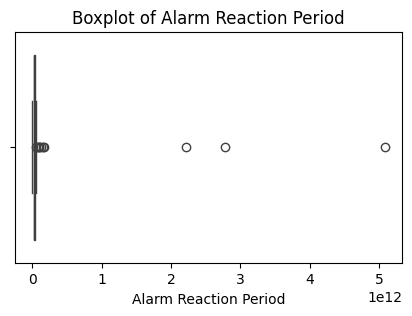

count                           90
mean     0 days 00:00:23.755555555
std      0 days 00:00:09.333172818
min                0 days 00:00:02
25%                0 days 00:00:17
50%                0 days 00:00:21
75%         0 days 00:00:27.750000
max                0 days 00:00:52
Name: alarm_reaction_period, dtype: object


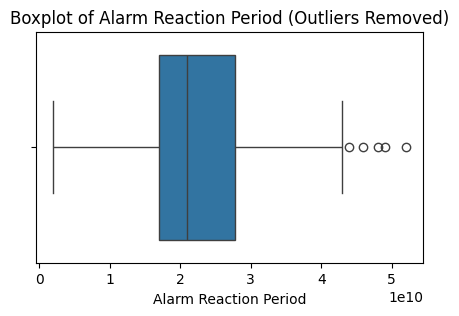

In [ ]:
# prompt: create a boxplot for this column: phi_alarm['alarm_reaction_period'], and help me remove outliers and then reoutput a description

import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(x=phi_alarm['alarm_reaction_period'])
plt.title('Boxplot of Alarm Reaction Period')
plt.xlabel('Alarm Reaction Period')
plt.show()

# Calculate the IQR
Q1 = phi_alarm['alarm_reaction_period'].quantile(0.25)
Q3 = phi_alarm['alarm_reaction_period'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
phi_alarm_no_outliers = phi_alarm[
    (phi_alarm['alarm_reaction_period'] >= lower_bound) &
    (phi_alarm['alarm_reaction_period'] <= upper_bound)
]

# Describe the data without outliers
print(phi_alarm_no_outliers['alarm_reaction_period'].describe())

# Create the boxplot without outliers
plt.figure(figsize=(5, 3))
sns.boxplot(x=phi_alarm_no_outliers['alarm_reaction_period'])
plt.title('Boxplot of Alarm Reaction Period (Outliers Removed)')
plt.xlabel('Alarm Reaction Period')
plt.show()


In [ ]:
phi_alarm.groupby(['silence_user_reason'])['silence_period'].describe()

,count,mean,std,min,25%,50%,75%,max
silence_user_reason,,,,,,,,
ASSIGNMENT_ENDED,68,2 days 22:23:51.264705882,10 days 07:56:46.847025293,0 days 00:09:07,0 days 07:41:02.500000,0 days 18:27:35.500000,1 days 02:41:05.750000,50 days 22:56:59
NO_RISK,2,0 days 00:04:08.500000,0 days 00:01:11.417784899,0 days 00:03:18,0 days 00:03:43.250000,0 days 00:04:08.500000,0 days 00:04:33.750000,0 days 00:04:59
RISK_ENDED,30,0 days 04:56:22.966666666,0 days 04:05:22.453865658,0 days 00:13:25,0 days 02:19:43,0 days 03:15:13,0 days 06:57:32.250000,0 days 16:23:33


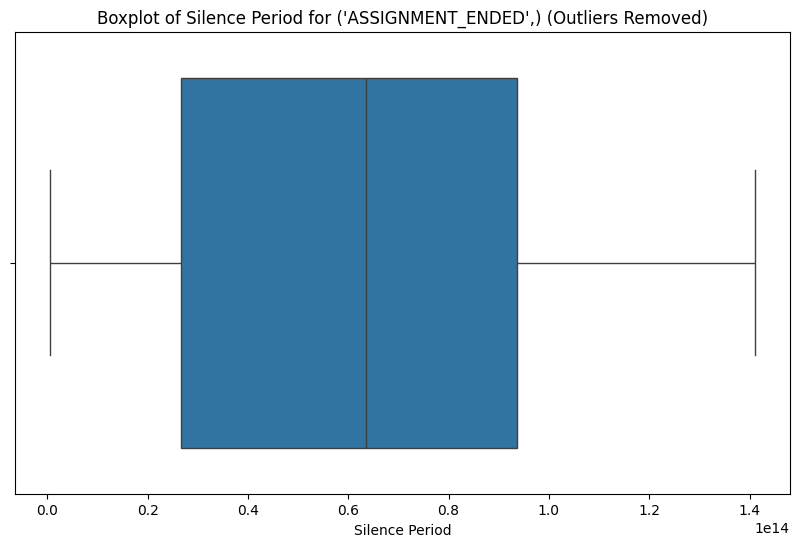

Description for ('ASSIGNMENT_ENDED',):
count                           65
mean     0 days 17:33:56.507692307
std      0 days 10:00:40.662393383
min                0 days 00:09:07
25%                0 days 07:24:04
50%                0 days 17:37:13
75%                1 days 02:01:55
max                1 days 15:10:16
Name: silence_period, dtype: object


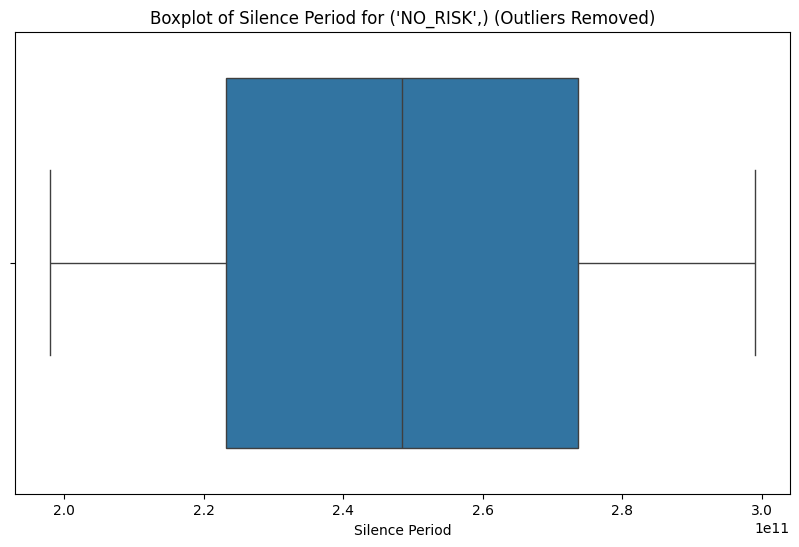

Description for ('NO_RISK',):
count                            2
mean        0 days 00:04:08.500000
std      0 days 00:01:11.417784899
min                0 days 00:03:18
25%         0 days 00:03:43.250000
50%         0 days 00:04:08.500000
75%         0 days 00:04:33.750000
max                0 days 00:04:59
Name: silence_period, dtype: object


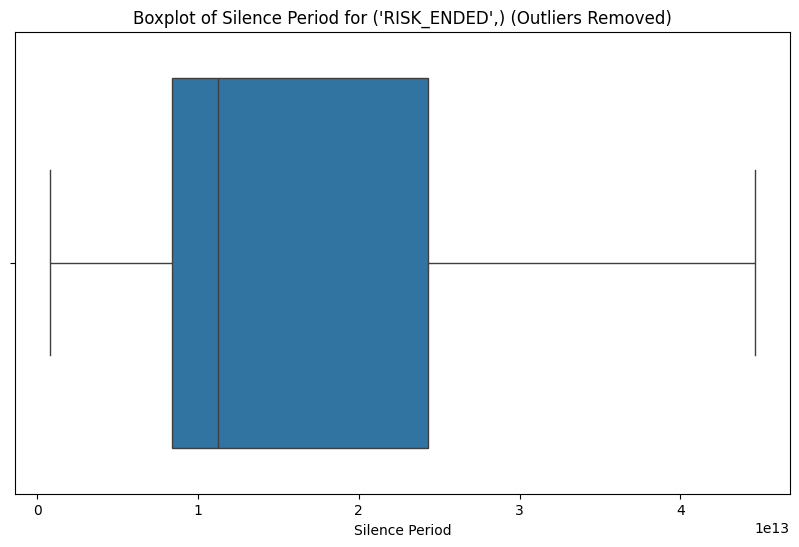

Description for ('RISK_ENDED',):
count                           29
mean     0 days 04:32:41.241379310
std      0 days 03:31:55.619412627
min                0 days 00:13:25
25%                0 days 02:19:30
50%                0 days 03:07:06
75%                0 days 06:44:39
max                0 days 12:23:42
Name: silence_period, dtype: object


In [ ]:
# prompt: Help me generate boxplot for each of these (phi_alarm.groupby(['silence_user_reason'])['silence_period'].describe()), first identify outliers and drop them before calculating the describe

import matplotlib.pyplot as plt
import seaborn as sns

for reason, data in phi_alarm.groupby(['silence_user_reason']):
    # Calculate the IQR
    Q1 = data['silence_period'].quantile(0.25)
    Q3 = data['silence_period'].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outlier removal
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    data_no_outliers = data[
        (data['silence_period'] >= lower_bound) &
        (data['silence_period'] <= upper_bound)
    ]

    # Create the boxplot without outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_no_outliers['silence_period'])
    plt.title(f'Boxplot of Silence Period for {reason} (Outliers Removed)')
    plt.xlabel('Silence Period')
    plt.show()

    # Describe the data without outliers
    print(f"Description for {reason}:")
    print(data_no_outliers['silence_period'].describe())


In [ ]:
test = phi_alarm[phi_alarm['silence_user_reason'] == 'ASSIGNMENT_ENDED']
test[~test['silence_user'].isna()]

,phi_health_service_id,phi_patient_name,alarm_id,alarm_time_utc,alarm_type,alarm_sub_type,alarm_description,alarm_name,alarm_vital_boundary_start_time,alarm_vital_boundary_end_time,alarm_vital_boundary_lower_bound,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno,alarm_on_period,silence_period,ack_period
170,3-75-36,Br Tu,523ed301-785f-44b6-bd65-33d4b482572d,2021-02-24 04:10:30,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2021-02-24 04:00:11,2021-02-24 04:10:11,30.0,NaN,False,False,2021-02-25 04:49:27,eatuheire,2021-02-25 04:09:19,eatuheire,NaN,ASSIGNMENT_ENDED,657,0 days 00:10:00,1 days 00:09:08,-1 days +23:19:52


In [ ]:
test2 = phi_alarm[~(phi_alarm['silence_user_reason'] == 'ASSIGNMENT_ENDED')]
test2

,phi_health_service_id,phi_patient_name,alarm_id,alarm_time_utc,alarm_type,alarm_sub_type,alarm_description,alarm_name,alarm_vital_boundary_start_time,alarm_vital_boundary_end_time,alarm_vital_boundary_lower_bound,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno,alarm_on_period,silence_period,ack_period
6,3-71-94,Ay Li,cb1f4e17-dac2-4d0d-9e81-171bb67f7a46,2020-01-27 08:50:06,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Heart Rate for Pulse Rate,PULSE_RATE,2020-01-27 07:53:42,2020-01-27 08:03:42,120.0,NaN,False,False,2020-01-27 11:37:15,pmwesigwa,2020-01-27 11:37:17,pmwesigwa,NaN,RISK_ENDED,683,0 days 00:10:00,0 days 03:43:35,0 days 00:00:02
7,3-71-94,Ay Li,32e63544-2bd3-4468-9650-b0c21d0f772e,2020-01-27 09:02:08,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-01-27 08:51:45,2020-01-27 09:01:45,30.0,NaN,False,False,2020-01-27 11:38:19,pmwesigwa,2020-01-27 11:38:21,pmwesigwa,NaN,RISK_ENDED,683,0 days 00:10:00,0 days 02:46:36,0 days 00:00:02
9,3-71-98,Tu Br,9ecbb451-29fc-41dd-9ffc-c391d6f85df0,2020-01-27 13:33:06,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Heart Rate for Pulse Rate,PULSE_RATE,2020-01-27 13:22:39,2020-01-27 13:32:39,120.0,NaN,False,False,2020-01-27 17:16:32,pmwesigwa,2020-01-27 17:16:33,pmwesigwa,NaN,RISK_ENDED,737,0 days 00:10:00,0 days 03:53:54,0 days 00:00:01
10,3_71_67,Tu Ma,25add9cb-6f91-440c-8826-b89572d85b20,2020-01-27 14:16:12,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Heart Rate for Pulse Rate,PULSE_RATE,2020-01-27 14:05:35,2020-01-27 14:15:35,120.0,NaN,False,False,2020-01-27 17:23:17,pmwesigwa,2020-01-27 17:23:18,pmwesigwa,NaN,RISK_ENDED,1018,0 days 00:10:00,0 days 03:17:43,0 days 00:00:01
11,3-71-94,Ay Li,0e04ee1f-ff6f-4f3e-b48b-ee6468394ea9,2020-01-27 15:29:56,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-01-27 15:19:40,2020-01-27 15:29:40,30.0,NaN,False,False,2020-01-27 17:50:17,pmwesigwa,2020-01-27 17:50:18,pmwesigwa,NaN,RISK_ENDED,683,0 days 00:10:00,0 days 02:30:38,0 days 00:00:01
12,3-71-98,Tu Br,9cc2e39c-5dad-4edd-b4d5-ecbac05740ad,2020-01-27 15:31:47,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-01-27 15:21:30,2020-01-27 15:31:30,30.0,NaN,False,False,2020-01-27 17:18:49,pmwesigwa,2020-01-27 17:18:51,pmwesigwa,NaN,RISK_ENDED,737,0 days 00:10:00,0 days 01:57:21,0 days 00:00:02
13,3-71-94,Ay Li,14bf197f-5663-4180-9976-8ba1c07da183,2020-01-27 17:19:55,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Heart Rate for Pulse Rate,PULSE_RATE,2020-01-27 17:09:39,2020-01-27 17:19:39,120.0,NaN,False,False,2020-01-27 17:51:23,pmwesigwa,2020-01-27 17:51:24,pmwesigwa,NaN,RISK_ENDED,683,0 days 00:10:00,0 days 00:41:45,0 days 00:00:01
15,3-71-94,Ay Li,d0e98865-039b-4a85-b882-d1b9ae2bf346,2020-01-27 18:49:10,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-01-27 18:38:48,2020-01-27 18:48:48,30.0,NaN,False,False,2020-01-28 07:12:47,pmwesigwa,2020-01-28 07:12:52,pmwesigwa,NaN,RISK_ENDED,683,0 days 00:10:00,0 days 12:34:04,0 days 00:00:05
16,3-71-98,Tu Br,1d10762a-5d40-48ca-b48d-c553df41f84d,2020-01-28 01:56:34,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Heart Rate for Pulse Rate,PULSE_RATE,2020-01-28 01:46:09,2020-01-28 01:56:09,120.0,NaN,False,False,2020-01-28 06:07:15,pmwesigwa,2020-01-28 06:07:19,pmwesigwa,NaN,RISK_ENDED,737,0 days 00:10:00,0 days 04:21:10,0 days 00:00:04
17,3-72-20,Ph Tu,424bc61d-3915-46c2-8fae-bb4f3264506c,2020-01-28 03:08:08,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,RESPIRATORY_RATE,2020-01-28 02:57:54,2020-01-28 03:07:54,30.0,NaN,False,False,2020-01-28 06:11:29,eatuheire,2020-01-28 06:11:33,eatuheire,NaN,RISK_ENDED,663,0 days 00:10:00,0 days 03:13:39,0 days 00:00:04


In [ ]:
phi_alarm['silence_user_reason'].unique()

array(['ASSIGNMENT_ENDED', 'RISK_ENDED', 'NO_RISK'], dtype=object)

In [ ]:
phi_alarm.groupby(['alarm_name'])['alarm_on_period'].mean()

,alarm_on_period
alarm_name,
COVERED_SKIN_TEMPERATURE,0 days 00:10:00
DIASTOLIC_BLOOD_PRESSURE,0 days 00:01:00
PULSE_RATE,0 days 00:10:00
RESPIRATORY_RATE,0 days 00:10:00
SPO2,0 days 00:10:00


In [ ]:
phi_alarm.groupby(['alarm_name'])['ack_period'].describe()


,count,mean,std,min,25%,50%,75%,max
alarm_name,,,,,,,,
COVERED_SKIN_TEMPERATURE,3,0 days 00:00:01,0 days 00:00:00,0 days 00:00:01,0 days 00:00:01,0 days 00:00:01,0 days 00:00:01,0 days 00:00:01
DIASTOLIC_BLOOD_PRESSURE,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
PULSE_RATE,12,0 days 00:00:01.416666666,0 days 00:00:00.996204919,0 days 00:00:00,0 days 00:00:01,0 days 00:00:01,0 days 00:00:02,0 days 00:00:04
RESPIRATORY_RATE,17,-1 days +23:57:40,0 days 00:09:44.451559156,-1 days +23:19:52,0 days 00:00:01,0 days 00:00:01,0 days 00:00:02,0 days 00:00:05
SPO2,1,0 days 00:00:03,NaT,0 days 00:00:03,0 days 00:00:03,0 days 00:00:03,0 days 00:00:03,0 days 00:00:03


In [ ]:
# prompt: remove the outlier here and them describe: phi_alarm.groupby(['alarm_name'])['ack_period'].describe()

# Calculate the IQR for 'ack_period'
Q1 = phi_alarm['ack_period'].quantile(0.25)
Q3 = phi_alarm['ack_period'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
phi_alarm_no_outliers = phi_alarm[
    (phi_alarm['ack_period'] >= lower_bound) &
    (phi_alarm['ack_period'] <= upper_bound)
]

# Describe the data without outliers, grouped by 'alarm_name'
phi_alarm_no_outliers.groupby(['alarm_name'])['ack_period'].describe()

,count,mean,std,min,25%,50%,75%,max
alarm_name,,,,,,,,
COVERED_SKIN_TEMPERATURE,3,0 days 00:00:01,0 days 00:00:00,0 days 00:00:01,0 days 00:00:01,0 days 00:00:01,0 days 00:00:01,0 days 00:00:01
PULSE_RATE,11,0 days 00:00:01.181818181,0 days 00:00:00.603022689,0 days 00:00:00,0 days 00:00:01,0 days 00:00:01,0 days 00:00:01.500000,0 days 00:00:02
RESPIRATORY_RATE,14,0 days 00:00:01.357142857,0 days 00:00:00.744946343,0 days 00:00:00,0 days 00:00:01,0 days 00:00:01,0 days 00:00:02,0 days 00:00:03
SPO2,1,0 days 00:00:03,NaT,0 days 00:00:03,0 days 00:00:03,0 days 00:00:03,0 days 00:00:03,0 days 00:00:03


In [ ]:
# Describe the data without outliers, grouped by 'alarm_name'
phi_alarm_no_outliers['ack_period'].describe()

,ack_period
count,29
mean,0 days 00:00:01.310344827
std,0 days 00:00:00.712312545
min,0 days 00:00:00
25%,0 days 00:00:01
50%,0 days 00:00:01
75%,0 days 00:00:02
max,0 days 00:00:03


## Vital Sample

- 106 patients in total
  - uniquely identified by patient_id & health_service_id (3 missing)
  - 4 names are repetitive

In [ ]:
vital_sample = pd.read_csv('/content/drive/MyDrive/Uganda/new_data/vital_sample.csv')
vital_sample.head(2)

,date_surgery,patient_id,first_name,last_name,generatedat,sourceid,name,doublevalue,week,health_service_id_new,bp_140_90,bp_160_110,mrrh_ipno
0,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 00:20:53,e4285833-f340-41f7-abeb-a484096b32a5,COVID19_STATUS,NaN,27,3-07-86-21,0,0,638
1,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 01:39:52,e4285833-f340-41f7-abeb-a484096b32a5,COVID19_STATUS,NaN,27,3-07-86-21,0,0,638


In [ ]:
vital_sample['name'].unique()

array(['COVID19_STATUS', 'WEARABLE_ON_ARM', 'PULSE_RATE',
       'SYSTOLIC_BLOOD_PRESSURE', 'DIASTOLIC_BLOOD_PRESSURE',
       'STEP_COUNT', 'MOTION', 'COVERED_SKIN_TEMPERATURE',
       'RESPIRATORY_RATE', 'SPO2'], dtype=object)

In [ ]:
vital_sample[vital_sample['name'].isin(['SYSTOLIC_BLOOD_PRESSURE', 'DIASTOLIC_BLOOD_PRESSURE'])]

,date_surgery,patient_id,first_name,last_name,generatedat,sourceid,name,doublevalue,week,health_service_id_new,bp_140_90,bp_160_110,mrrh_ipno
5,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 05:47:10,e4285833-f340-41f7-abeb-a484096b32a5,SYSTOLIC_BLOOD_PRESSURE,103.0,27,3-07-86-21,0,0,638
6,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 05:47:10,e4285833-f340-41f7-abeb-a484096b32a5,DIASTOLIC_BLOOD_PRESSURE,64.0,27,3-07-86-21,0,0,638
7478,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 11:30:05,02a8f631-391a-4320-acdb-f85da60d01f3,DIASTOLIC_BLOOD_PRESSURE,60.0,27,3-07-86-21,0,0,638
7479,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 11:30:05,02a8f631-391a-4320-acdb-f85da60d01f3,SYSTOLIC_BLOOD_PRESSURE,104.0,27,3-07-86-21,0,0,638
14508,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 17:04:55,7c58bc88-3312-4b9d-ada7-2f8dac1971ec,SYSTOLIC_BLOOD_PRESSURE,108.0,27,3-07-86-21,0,0,638
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048735,2020-02-29,a16fa56f-c86f-46cb-829f-c64552dfa7d9,Ke,Jo,2020-03-01 03:45:48,IHEALTH_EASE_BP_CUFF,DIASTOLIC_BLOOD_PRESSURE,70.0,3,3-86-78,0,0,254
3052798,2020-02-29,a16fa56f-c86f-46cb-829f-c64552dfa7d9,Ke,Jo,2020-03-01 08:53:26,IHEALTH_EASE_BP_CUFF,SYSTOLIC_BLOOD_PRESSURE,108.0,3,3-86-78,0,0,254
3052799,2020-02-29,a16fa56f-c86f-46cb-829f-c64552dfa7d9,Ke,Jo,2020-03-01 08:53:26,IHEALTH_EASE_BP_CUFF,DIASTOLIC_BLOOD_PRESSURE,73.0,3,3-86-78,0,0,254
3058233,2020-02-29,a16fa56f-c86f-46cb-829f-c64552dfa7d9,Ke,Jo,2020-03-01 12:59:25,IHEALTH_EASE_BP_CUFF,SYSTOLIC_BLOOD_PRESSURE,91.0,3,3-86-78,0,0,254


In [ ]:
vital_sample.shape

(3060253, 13)

#### Vital Signs Distribution Check

<ipython-input-63-326657baad43>:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  median_values = df.groupby(['patient_id','name']).resample(str(20)+'T')['doublevalue'].median()


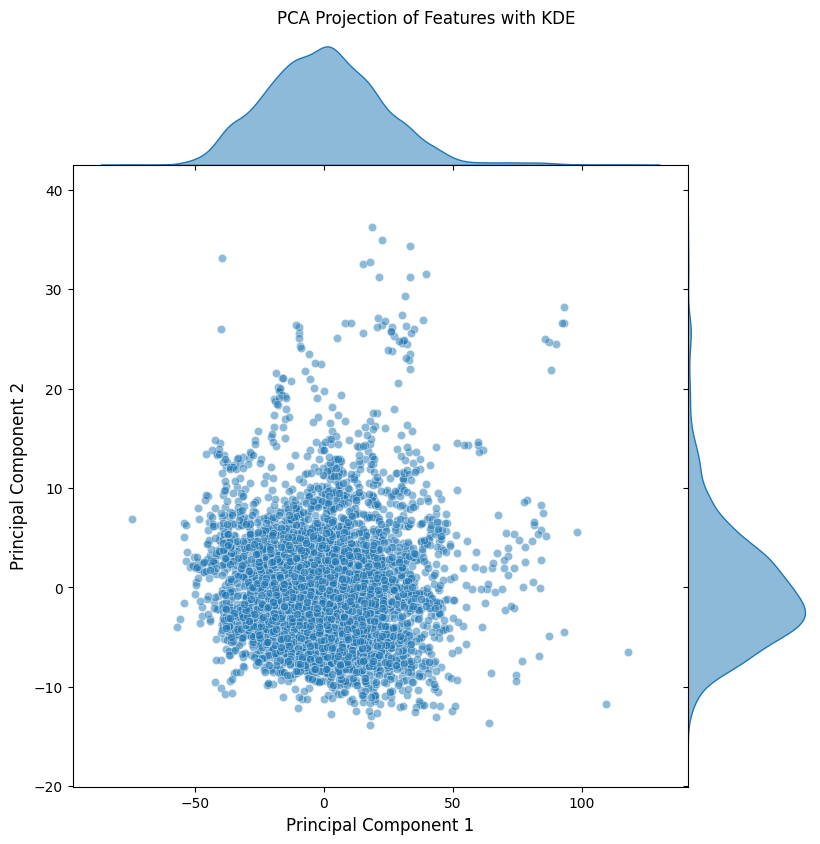

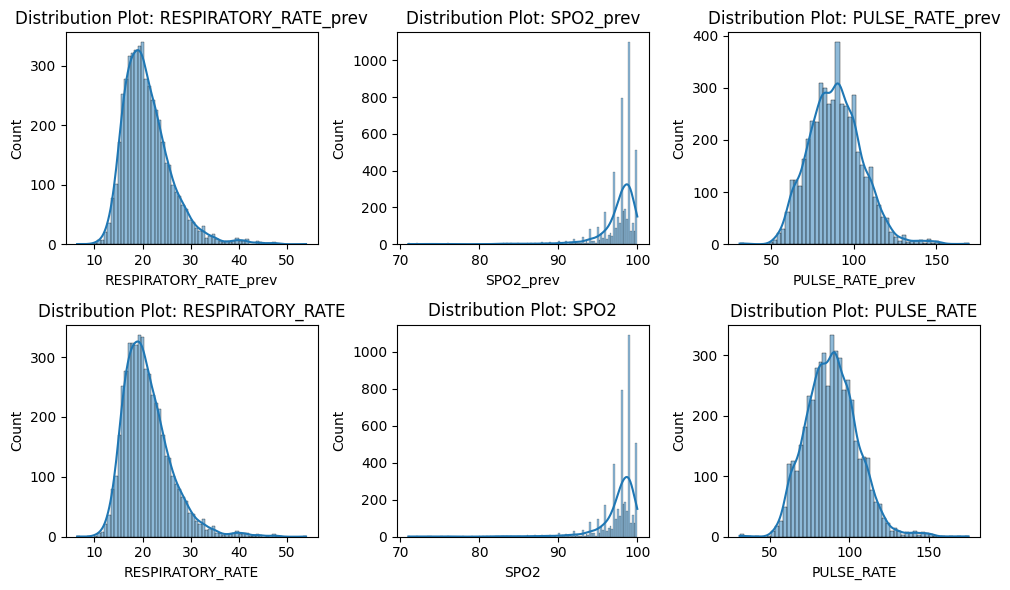

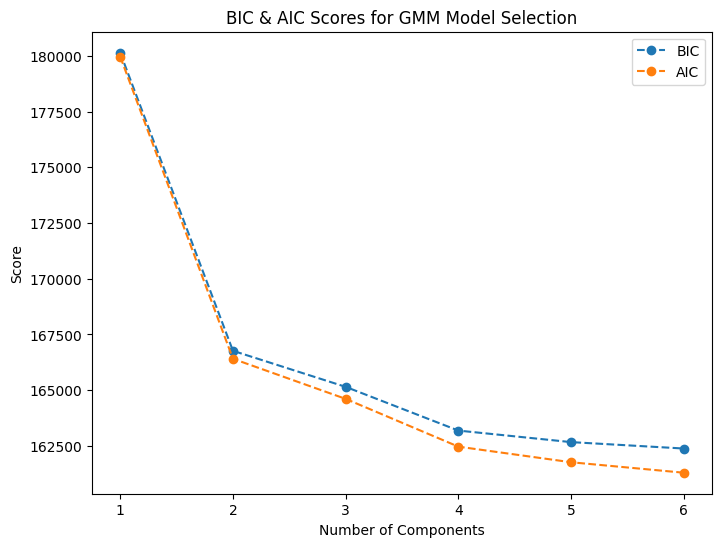

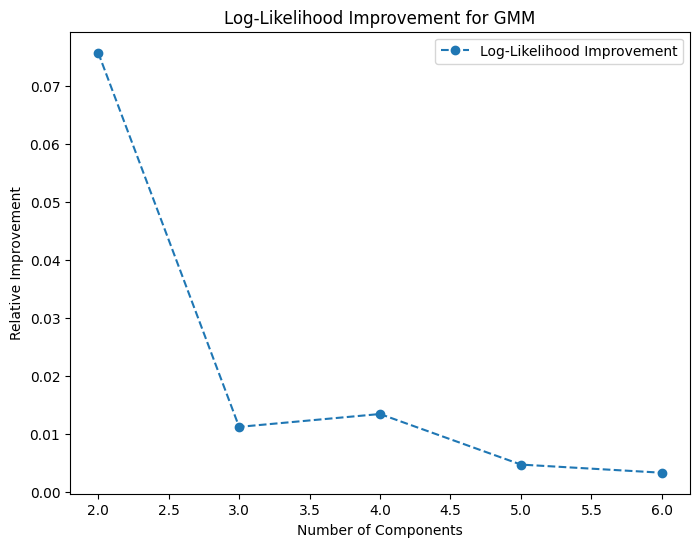

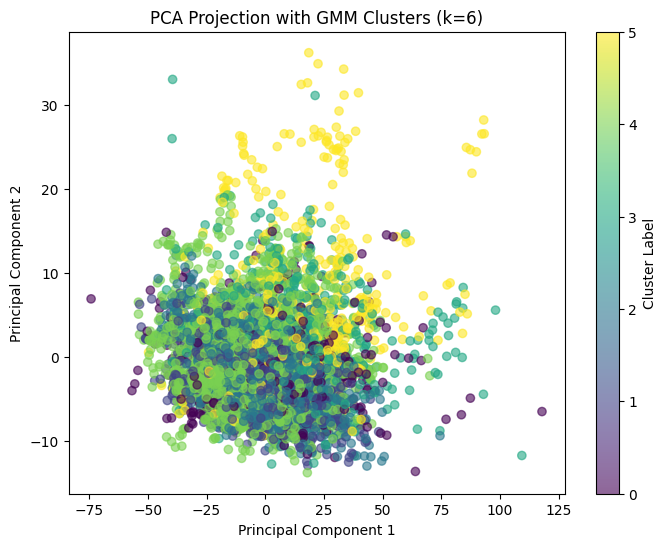

GMM Log-Likelihood: -16.347935033737173
Single Gaussian Log-Likelihood: -18.27297329658339
GMM provides a better fit than a single Gaussian.

RESPIRATORY_RATE_prev - Kolmogorov-Smirnov Test:
KS Statistic: 0.07556368068251067, p-value: 1.2098910041077403e-12
RESPIRATORY_RATE_prev is likely **not** normally distributed (p < 0.05).

SPO2_prev - Kolmogorov-Smirnov Test:
KS Statistic: 0.23908186065407272, p-value: 8.163977215679882e-124
SPO2_prev is likely **not** normally distributed (p < 0.05).

PULSE_RATE_prev - Kolmogorov-Smirnov Test:
KS Statistic: 0.023562868169815152, p-value: 0.12997739129725322
PULSE_RATE_prev is likely normally distributed (p >= 0.05).

RESPIRATORY_RATE - Kolmogorov-Smirnov Test:
KS Statistic: 0.0771887060735324, p-value: 3.556711353980902e-13
RESPIRATORY_RATE is likely **not** normally distributed (p < 0.05).

SPO2 - Kolmogorov-Smirnov Test:
KS Statistic: 0.23258175908998577, p-value: 3.907293250438078e-117
SPO2 is likely **not** normally distributed (p < 0.05).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy.stats import anderson, ks_2samp

df = pd.read_csv('/content/drive/MyDrive/Uganda/new_data/vital_sample.csv')

# Convert 'generatedat' to datetime and sort data
df['generatedat'] = pd.to_datetime(df['generatedat'])
df.sort_values(['patient_id', 'generatedat'], inplace=True)

df['generatedat'] = pd.to_datetime(df['generatedat'], errors='coerce')
df.set_index('generatedat', inplace=True)
df.sort_index(inplace=True)

first_entries = df.groupby('patient_id').head(1).reset_index()
median_values = df.groupby(['patient_id','name']).resample(str(20)+'T')['doublevalue'].median()
median_values = median_values.reset_index()
resampled_df = median_values.dropna(subset=['doublevalue'])
pivot_df = resampled_df.pivot_table(index=['patient_id', 'generatedat'], columns='name', values='doublevalue')
vital_signs = ['RESPIRATORY_RATE', 'SPO2', 'PULSE_RATE']
pivot_df = pivot_df[vital_signs]
pivot_df = pivot_df.dropna().reset_index()

pivot_df['time_diff'] = pivot_df.groupby('patient_id')['generatedat'].diff().dt.total_seconds() / 60
pivot_df = pivot_df[pivot_df['time_diff'] == 20]

# Generate previous timestep values only for valid 20-min intervals
for var in vital_signs:
    pivot_df[f'{var}_prev'] = pivot_df.groupby('patient_id')[var].shift(1)

# Drop NaNs from shift operation
pivot_df.dropna(inplace=True)

# Select relevant columns for GMM analysis
features = [f"{var}_prev" for var in vital_signs] + vital_signs
X = pivot_df[features]

# =========================
# 1. Pairwise Scatter Plots
# =========================
# sns.pairplot(X, diag_kind='kde')
# plt.suptitle("Pairwise Scatter Plots with KDE", y=1.02)
# plt.show()

# =========================
# 2. PCA for Visualization
# =========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

g = sns.JointGrid(x=X_pca[:, 0], y=X_pca[:, 1], space=0, height=8)
g.plot_joint(sns.scatterplot, alpha=0.5)
g.plot_marginals(sns.kdeplot, fill=True, alpha=0.5)
g.set_axis_labels("Principal Component 1", "Principal Component 2", fontsize=12)
plt.suptitle("PCA Projection of Features with KDE", y=1.02)
plt.show()

# =========================
# 3. KDE Plot for Each Variable
# =========================
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.ravel()

for i, col in enumerate(features):
    sns.histplot(X[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution Plot: {col}')

plt.tight_layout()
plt.show()

# =========================
# 4. Fit GMM with Different Components and Select Best One
# =========================
bic_scores = []
log_likelihoods = []
aic_scores = []
n_components_range = range(1, 7)  # Test 1 to 6 components

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))
    log_likelihoods.append(gmm.score(X))

# Plot BIC & AIC
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, bic_scores, label="BIC", marker='o', linestyle="--")
plt.plot(n_components_range, aic_scores, label="AIC", marker='o', linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("BIC & AIC Scores for GMM Model Selection")
plt.legend()
plt.show()

# Compute improvement rate
improvement_rate = np.diff(log_likelihoods) / np.abs(log_likelihoods[:-1])
# Plot Log-Likelihood Improvement
plt.figure(figsize=(8,6))
plt.plot(n_components_range[1:], improvement_rate, marker='o', linestyle="--", label="Log-Likelihood Improvement")
plt.xlabel("Number of Components")
plt.ylabel("Relative Improvement")
plt.title("Log-Likelihood Improvement for GMM")
plt.legend()
plt.show()


# Fit GMM with Optimal Components
optimal_components = n_components_range[np.argmin(bic_scores)]
gmm = GaussianMixture(n_components=optimal_components, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# PCA Projection with GMM Clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA Projection with GMM Clusters (k={optimal_components})')
plt.colorbar(label='Cluster Label')
plt.show()

# =========================
# 5. Compare to a Single Gaussian Model
# =========================
single_gaussian = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
single_gaussian.fit(X)

log_likelihood_gmm = gmm.score(X)
log_likelihood_single = single_gaussian.score(X)

print(f"GMM Log-Likelihood: {log_likelihood_gmm}")
print(f"Single Gaussian Log-Likelihood: {log_likelihood_single}")

if log_likelihood_gmm > log_likelihood_single:
    print("GMM provides a better fit than a single Gaussian.")
else:
    print("Data does not strongly favor a GMM over a single Gaussian.")

# # =========================
# # 6. Normality Test (Anderson-Darling)
# # =========================
# for col in features:
#     result = anderson(X[col])
#     print(f"\n{col} - Anderson-Darling Test:")
#     print(f"Test Statistic: {result.statistic}")
#     print(f"Critical Values: {result.critical_values}")
#     print(f"Significance Levels: {result.significance_level}")

# =========================
# 7. Kolmogorov-Smirnov Test (Compare to Gaussian)
# =========================
for col in features:
    normal_sample = np.random.normal(X[col].mean(), X[col].std(), len(X[col]))
    ks_stat, ks_pval = ks_2samp(X[col], normal_sample)
    print(f"\n{col} - Kolmogorov-Smirnov Test:")
    print(f"KS Statistic: {ks_stat}, p-value: {ks_pval}")

    if ks_pval < 0.05:
        print(f"{col} is likely **not** normally distributed (p < 0.05).")
    else:
        print(f"{col} is likely normally distributed (p >= 0.05).")

## Vital Alarm Sample v2

- Unique Alarm ID: 84/194 (why are some missing)?
- No Alarm Name column
- Fewer rows (due to how merging happens?)
- Matching (patient name & health_service_id) --> match alarm records for 34 patients, with only physiological alarm

In [ ]:
vital_alarm_sample_ver2 = pd.read_csv('/content/drive/MyDrive/Uganda/new_data/vital_alarm_sample_ver2.csv')
vital_alarm_sample_ver2.head(2)

<ipython-input-3-c3e6ea02869e>:1: DtypeWarning: Columns (9,12,13,14,15,16,17,18,19,20,23,24,25,26,27,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  vital_alarm_sample_ver2 = pd.read_csv('/content/drive/MyDrive/Uganda/new_data/vital_alarm_sample_ver2.csv')


,date_surgery,patient_id,first_name,last_name,generatedat,sourceid,name,doublevalue,week,health_service_id_new,...,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno
0,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 00:20:53,e4285833-f340-41f7-abeb-a484096b32a5,COVID19_STATUS,NaN,27,3-07-86-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638
1,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 01:39:52,e4285833-f340-41f7-abeb-a484096b32a5,COVID19_STATUS,NaN,27,3-07-86-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638


In [ ]:
vital_alarm_sample_ver2.shape

(3060165, 32)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
vital_alarm_sample_ver2.head(5)

,date_surgery,patient_id,first_name,last_name,generatedat,sourceid,name,doublevalue,week,health_service_id_new,bp_140_90,bp_160_110,phi_health_service_id,phi_patient_name,alarm_id,alarm_time_utc,alarm_type,alarm_sub_type,alarm_description,alarm_vital_boundary_start_time,alarm_vital_boundary_end_time,alarm_vital_boundary_lower_bound,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno
0,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 00:20:53,e4285833-f340-41f7-abeb-a484096b32a5,COVID19_STATUS,NaN,27,3-07-86-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638
1,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 01:39:52,e4285833-f340-41f7-abeb-a484096b32a5,COVID19_STATUS,NaN,27,3-07-86-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638
2,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 01:39:53,00A0033B,WEARABLE_ON_ARM,NaN,27,3-07-86-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638
3,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 01:40:32,00A0033B,WEARABLE_ON_ARM,NaN,27,3-07-86-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638
4,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 05:47:10,e4285833-f340-41f7-abeb-a484096b32a5,PULSE_RATE,101.0,27,3-07-86-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638


In [ ]:
vital_alarm_sample_ver2[(vital_alarm_sample_ver2['alarm_id'] == 'd6e65367-85be-4de4-9ed8-95fa2773e7e8') & (vital_alarm_sample_ver2['patient_id'] == '0a6280a6-4eee-4b86-98a5-2e470f989daf')]

,date_surgery,patient_id,first_name,last_name,generatedat,sourceid,name,doublevalue,week,health_service_id_new,bp_140_90,bp_160_110,phi_health_service_id,phi_patient_name,alarm_id,alarm_time_utc,alarm_type,alarm_sub_type,alarm_description,alarm_vital_boundary_start_time,alarm_vital_boundary_end_time,alarm_vital_boundary_lower_bound,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno
2365839,2020-01-31,0a6280a6-4eee-4b86-98a5-2e470f989daf,Ka,Br,2020-01-31 19:51:25,00A0032C,RESPIRATORY_RATE,7.183908,1,3-72-89,0,0,3-72-89,Na Re,d6e65367-85be-4de4-9ed8-95fa2773e7e8,2020-01-31 20:32:26,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,2020-01-31 19:45:35,2020-01-31 19:55:35,30.0,NaN,False,False,2020-01-31 22:05:43,jamumpeira,2020-01-31 22:05:45,jamumpeira,NaN,RISK_ENDED,1010
2365840,2020-01-31,0a6280a6-4eee-4b86-98a5-2e470f989daf,Ka,Br,2020-01-31 19:51:26,00A0032C,RESPIRATORY_RATE,9.946950,1,3-72-89,0,0,3-72-89,Na Re,d6e65367-85be-4de4-9ed8-95fa2773e7e8,2020-01-31 20:32:26,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Respiratory Rate for Respiratory Rate,2020-01-31 19:45:35,2020-01-31 19:55:35,30.0,NaN,False,False,2020-01-31 22:05:43,jamumpeira,2020-01-31 22:05:45,jamumpeira,NaN,RISK_ENDED,1010


In [ ]:
# prompt: Help me count the number of unique (patient_id, alarm_id) pairs for each alarm_description

unique_patient_alarm_counts = vital_alarm_sample_ver2.groupby('alarm_description').apply(lambda x: x[['patient_id', 'alarm_id']].drop_duplicates().shape[0]).reset_index(name='unique_patient_alarm_count')
unique_patient_alarm_counts


<ipython-input-11-6bc820fee437>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_patient_alarm_counts = vital_alarm_sample_ver2.groupby('alarm_description').apply(lambda x: x[['patient_id', 'alarm_id']].drop_duplicates().shape[0]).reset_index(name='unique_patient_alarm_count')


,alarm_description,unique_patient_alarm_count
0,Heart Rate for Pulse Rate,28
1,Oxygen saturation for SpO2,4
2,Respiratory Rate for Respiratory Rate,45
3,Temperature for Covered Skin Temperature,17


In [ ]:
# prompt: from the vital_alarm_sample_ver2 df, select rows that has a alarm_description of 'Oxygen saturation for SpO2', and only keep unique (patient_id, alarmd_id)s, keeping the first row

# Assuming your DataFrame is named vital_alarm_sample_ver2
# Select rows with 'Oxygen saturation for SpO2' alarm description
df_filtered = vital_alarm_sample_ver2[
    vital_alarm_sample_ver2['alarm_description'] == 'Oxygen saturation for SpO2'
]

# Keep only unique (patient_id, alarm_id) combinations, keeping the first row
df_unique = df_filtered.groupby(['patient_id', 'alarm_id']).first().reset_index()

df_unique


,patient_id,alarm_id,date_surgery,first_name,last_name,generatedat,sourceid,name,doublevalue,week,health_service_id_new,bp_140_90,bp_160_110,phi_health_service_id,phi_patient_name,alarm_time_utc,alarm_type,alarm_sub_type,alarm_description,alarm_vital_boundary_start_time,alarm_vital_boundary_end_time,alarm_vital_boundary_lower_bound,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno
0,0aace22c-e015-4f97-aa5c-5d06475b9dd4,01b8f4c5-feaf-4612-9709-bbbb271fa70e,2020-10-22,Ev,Tu,2020-10-23 02:44:13,00A003FC,SPO2,99.0,6,3-28-65,0,0,3-28-65,Ev Tu,2020-10-23 02:54:40,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Oxygen saturation for SpO2,2020-10-23 02:44:12,2020-10-23 02:54:12,NaN,90.0,False,False,None,None,2020-10-24 02:59:44,None,NaN,ASSIGNMENT_ENDED,1237
1,57b32cc0-ec0b-42d1-80d7-c95b5a0e20ae,a2d2d355-4f20-4c9d-b292-b896b2a2a9df,2021-03-30,Ar,Do,2021-03-30 12:04:28,GEN1:00A0039C,SPO2,98.0,17,3-54-32-21,0,0,3_54_32,Ar Do,2021-03-30 12:14:10,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Oxygen saturation for SpO2,2021-03-30 12:03:38,2021-03-30 12:13:38,NaN,90.0,False,False,None,None,2021-05-20 06:26:32,None,NaN,ASSIGNMENT_ENDED,358
2,63b35e01-8f43-49a6-8fe7-2d4c6ca077ee,dc5097f0-32c2-4344-8822-f3e662e35121,2021-10-12,Si,Ha,2021-10-12 22:55:28,GEN1:00A0043D,SPO2,98.0,31,3-24-11-21,0,0,3_24_11,Si Ha,2021-10-12 23:03:56,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Oxygen saturation for SpO2,2021-10-12 22:53:40,2021-10-12 23:03:40,NaN,90.0,False,False,None,None,2021-10-14 07:20:12,None,NaN,ASSIGNMENT_ENDED,1154
3,eed1e910-25b1-4b84-bf59-4a06b41ec479,645cacab-3e32-45c0-974d-3ca532063800,2020-10-13,Na,Ph,2020-10-13 14:23:12,00A00330,SPO2,92.0,6,3-26-45,0,0,3_26_45,Na Ph,2020-10-13 14:32:54,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Oxygen saturation for SpO2,2020-10-13 14:22:38,2020-10-13 14:32:38,NaN,90.0,False,False,None,None,2020-10-14 18:43:36,None,NaN,ASSIGNMENT_ENDED,1149


In [ ]:
vital_alarm_sample_ver2['silence_user_reason'].unique()

array([nan, 'ASSIGNMENT_ENDED', 'NO_RISK', 'RISK_ENDED'], dtype=object)

In [ ]:
test3 = vital_alarm_sample_ver2[~vital_alarm_sample_ver2['alarm_id'].isna()]
test3
# test3[test3['alarm_id'] == '62d915bd-6a45-42ad-9b28-e63a405d3fae']

,date_surgery,patient_id,first_name,last_name,generatedat,sourceid,name,doublevalue,week,health_service_id_new,bp_140_90,bp_160_110,phi_health_service_id,phi_patient_name,alarm_id,alarm_time_utc,alarm_type,alarm_sub_type,alarm_description,alarm_vital_boundary_start_time,alarm_vital_boundary_end_time,alarm_vital_boundary_lower_bound,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno
571313,2021-10-12,63b35e01-8f43-49a6-8fe7-2d4c6ca077ee,Si,Ha,2021-10-12 21:52:40,GEN1:00A0043D,COVERED_SKIN_TEMPERATURE,37.650237,31,3-24-11-21,0,0,3_24_11,Si Ha,62d915bd-6a45-42ad-9b28-e63a405d3fae,2021-10-12 22:02:37,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Temperature for Covered Skin Temperature,2021-10-12 21:52:11,2021-10-12 22:02:11,38.0,NaN,False,False,NaN,NaN,2021-10-14 07:20:12,NaN,NaN,ASSIGNMENT_ENDED,1154
571314,2021-10-12,63b35e01-8f43-49a6-8fe7-2d4c6ca077ee,Si,Ha,2021-10-12 21:52:41,GEN1:00A0043D,COVERED_SKIN_TEMPERATURE,37.649149,31,3-24-11-21,0,0,3_24_11,Si Ha,62d915bd-6a45-42ad-9b28-e63a405d3fae,2021-10-12 22:02:37,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Temperature for Covered Skin Temperature,2021-10-12 21:52:11,2021-10-12 22:02:11,38.0,NaN,False,False,NaN,NaN,2021-10-14 07:20:12,NaN,NaN,ASSIGNMENT_ENDED,1154
571315,2021-10-12,63b35e01-8f43-49a6-8fe7-2d4c6ca077ee,Si,Ha,2021-10-12 21:52:42,GEN1:00A0043D,COVERED_SKIN_TEMPERATURE,37.647850,31,3-24-11-21,0,0,3_24_11,Si Ha,62d915bd-6a45-42ad-9b28-e63a405d3fae,2021-10-12 22:02:37,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Temperature for Covered Skin Temperature,2021-10-12 21:52:11,2021-10-12 22:02:11,38.0,NaN,False,False,NaN,NaN,2021-10-14 07:20:12,NaN,NaN,ASSIGNMENT_ENDED,1154
571316,2021-10-12,63b35e01-8f43-49a6-8fe7-2d4c6ca077ee,Si,Ha,2021-10-12 21:52:43,GEN1:00A0043D,COVERED_SKIN_TEMPERATURE,37.646340,31,3-24-11-21,0,0,3_24_11,Si Ha,62d915bd-6a45-42ad-9b28-e63a405d3fae,2021-10-12 22:02:37,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Temperature for Covered Skin Temperature,2021-10-12 21:52:11,2021-10-12 22:02:11,38.0,NaN,False,False,NaN,NaN,2021-10-14 07:20:12,NaN,NaN,ASSIGNMENT_ENDED,1154
571333,2021-10-12,63b35e01-8f43-49a6-8fe7-2d4c6ca077ee,Si,Ha,2021-10-12 21:53:17,GEN1:00A0043D,COVERED_SKIN_TEMPERATURE,37.591236,31,3-24-11-21,0,0,3_24_11,Si Ha,62d915bd-6a45-42ad-9b28-e63a405d3fae,2021-10-12 22:02:37,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Temperature for Covered Skin Temperature,2021-10-12 21:52:11,2021-10-12 22:02:11,38.0,NaN,False,False,NaN,NaN,2021-10-14 07:20:12,NaN,NaN,ASSIGNMENT_ENDED,1154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047059,2020-02-29,a16fa56f-c86f-46cb-829f-c64552dfa7d9,Ke,Jo,2020-03-01 00:57:15,00A004A0,COVERED_SKIN_TEMPERATURE,38.323184,3,3-86-78,0,0,3-86-78,Ke Jo,38525ce8-0b73-4345-9e82-04cd3f38744e,2020-03-01 01:01:19,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Temperature for Covered Skin Temperature,2020-03-01 00:48:43,2020-03-01 00:58:43,38.0,NaN,False,False,NaN,NaN,2020-03-02 16:11:35,NaN,NaN,ASSIGNMENT_ENDED,254
3047068,2020-02-29,a16fa56f-c86f-46cb-829f-c64552dfa7d9,Ke,Jo,2020-03-01 00:58:42,00A004A0,COVERED_SKIN_TEMPERATURE,38.284318,3,3-86-78,0,0,3-86-78,Ke Jo,38525ce8-0b73-4345-9e82-04cd3f38744e,2020-03-01 01:01:19,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Temperature for Covered Skin Temperature,2020-03-01 00:48:43,2020-03-01 00:58:43,38.0,NaN,False,False,NaN,NaN,2020-03-02 16:11:35,NaN,NaN,ASSIGNMENT_ENDED,254
3047071,2020-02-29,a16fa56f-c86f-46cb-829f-c64552dfa7d9,Ke,Jo,2020-03-01 00:58:42,00A004A0,COVERED_SKIN_TEMPERATURE,38.284318,3,3-86-78,0,0,3-86-78,Ke Jo,38525ce8-0b73-4345-9e82-04cd3f38744e,2020-03-01 01:01:19,PHYSIOLOGICAL,PATIENT_CUSTOM_VITAL,Temperature for Covered Skin Temperature,2020-03-01 00:48:43,2020-03-01 00:58:43,38.0,NaN,False,False,NaN,NaN,2020-03-02 16:11:35,NaN,NaN,ASSIGNMENT_ENDED,254
3047072,2

In [ ]:
test4 = vital_alarm_sample_ver2[vital_alarm_sample_ver2['alarm_id'].isna()]
test4

,date_surgery,patient_id,first_name,last_name,generatedat,sourceid,name,doublevalue,week,health_service_id_new,bp_140_90,bp_160_110,phi_health_service_id,phi_patient_name,alarm_id,alarm_time_utc,alarm_type,alarm_sub_type,alarm_description,alarm_vital_boundary_start_time,alarm_vital_boundary_end_time,alarm_vital_boundary_lower_bound,alarm_vital_boundary_upper_bound,alarm_vital_boundary_lower_bound_included,alarm_vital_boundary_upper_bound_included,first_acknowledge_time,first_acknowledge_user,silence_time,silence_user,silence_user_comment,silence_user_reason,mrrh_ipno
0,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 00:20:53,e4285833-f340-41f7-abeb-a484096b32a5,COVID19_STATUS,NaN,27,3-07-86-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638
1,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 01:39:52,e4285833-f340-41f7-abeb-a484096b32a5,COVID19_STATUS,NaN,27,3-07-86-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638
2,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 01:39:53,00A0033B,WEARABLE_ON_ARM,NaN,27,3-07-86-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638
3,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 01:40:32,00A0033B,WEARABLE_ON_ARM,NaN,27,3-07-86-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638
4,2021-08-11,2208d7e3-ba1b-4bbb-8213-e41803d62113,Tu,An,2021-08-11 05:47:10,e4285833-f340-41f7-abeb-a484096b32a5,PULSE_RATE,101.000000,27,3-07-86-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060160,2020-02-29,a16fa56f-c86f-46cb-829f-c64552dfa7d9,Ke,Jo,2020-03-01 14:56:47,00A004A0,MOTION,2.000000,3,3-86-78,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254
3060161,2020-02-29,a16fa56f-c86f-46cb-829f-c64552dfa7d9,Ke,Jo,2020-03-01 14:56:48,00A004A0,PULSE_RATE,62.929138,3,3-86-78,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254
3060162,2020-02-29,a16fa56f-c86f-46cb-829f-c64552dfa7d9,Ke,Jo,2020-03-01 14:56:48,00A004A0,RESPIRATORY_RATE,19.669243,3,3-86-78,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254
3060163,2020-02-29,a16fa56f-c86f-46cb-829f-c64552dfa7d9,Ke,Jo,2020-03-01 14:56:48,00A004A0,COVERED_SKIN_TEMPERATURE,35.940551,3,3-86-78,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254


In [ ]:
vital_alarm_sample_ver2.shape

(3060165, 32)

In [ ]:
vital_alarm_sample_ver2['alarm_id'].nunique()

84